In [9]:
import numpy as np
from numpy.lib import recfunctions as rfn
import matplotlib.pyplot as plt

In [10]:
@np.vectorize
def A1(D, t):
    pi = np.pi
    c = np.cos(t)
    s = np.sin(t)
    return s*(D*c/2)

@np.vectorize
def B1(D, t):
    pi = np.pi
    c = np.cos(t)
    s = np.sin(t)
    return s*(1 - D*c/2)

@np.vectorize
def A2(D, t):
    pi = np.pi
    c = np.cos(t)
    s = np.sin(t)
    return (pi/2 - 2*D*s + D*D*s*s/2)

@np.vectorize
def B2(D, t):
    pi = np.pi
    c = np.cos(t)
    s = np.sin(t)
    return (np.arcsin(1./(D*s)) - np.arccos(1./(D*s))) - 2*(1 - np.sqrt(D*D*s*s - 1)) + (1 - D*D*s*s/2)

In [42]:
# @np.vectorize
def p(D, N=1000):
    if 0 <= D <= 1:
        return 3*D/2 - 4*D*D/np.pi + 3*D*D*D/(4*np.pi)
    elif 1 <= D <= np.sqrt(2):
        x = np.linspace(0, np.pi/2, N)
        def f(X):
            Y = []
            for x in X:
                if 0 <= x <= np.arccos(1/D):
                    y = B1(D, x)*A2(D, x)
                elif np.arccos(1/D) <= x <= np.arcsin(1./D):
                    y = A1(D, x)*A2(D, x)
                elif np.arcsin(1./D) <= x <= np.pi/2:
                    y = A1(D, x)*B2(D, x)
                else:
                    y = 0
                Y.append(y)
            return Y
        
        return (12./np.pi)*np.trapz(y=f(x), x=x)
    elif np.sqrt(2) <= D <= np.sqrt(3):
        x = np.linspace(0, np.pi/2, N)
        def f(X):
            Y = []
            for x in X:
                if 0 <= x <= np.arcsin(1./D):
                    y = B1(D, x)*A2(D, x)
                elif np.arcsin(1/D) <= x <= np.arccos(1./D):
                    y = B1(D, x)*B2(D, x)
                elif np.arccos(1./D) <= x <= np.arcsin(np.sqrt(2)/D):
                    y = A1(D, x)*B2(D, x)
                else:
                    y = 0
                Y.append(y)
            return Y
        
        return (12./np.pi)*np.trapz(y=f(x), x=x)
    elif np.sqrt(3) <= D <= 2:
        x = np.linspace(0, np.pi/2, N)
        def f(X):
            Y = []
            for x in X:
                if 0 <= x <= np.arcsin(1./D):
                    y = B1(D, x)*A2(D, x)
                elif np.arcsin(1/D) <= x <= np.arcsin(np.sqrt(2)/D):
                    y = B1(D, x)*B2(D, x)
                else:
                    y = 0
                Y.append(y)
            return Y
        
        return (12./np.pi)*np.trapz(y=f(x), x=x)
    elif 2 <= D <= np.sqrt(5):
        x = np.linspace(0, np.pi/2, N)
        def f(X):
            Y = []
            for x in X:
                if np.arccos(2/D) <= x <= np.arcsin(1./D):
                    y = B1(D, x)*A2(D, x)
                elif np.arcsin(1/D) <= x <= np.arcsin(np.sqrt(2)/D):
                    y = B1(D, x)*B2(D, x)
                else:
                    y = 0
                Y.append(y)
            return Y
        
        return (12./np.pi)*np.trapz(y=f(x), x=x)
    elif np.sqrt(5) <= D <= np.sqrt(6):
        x = np.linspace(0, np.pi/2, N)
        def f(X):
            Y = []
            for x in X:
                if np.arccos(2/D) <= x <= np.arcsin(np.sqrt(2)/D):
                    y = B1(D, x)*B2(D, x)
                else:
                    y = 0
                Y.append(y)
            return Y
        
        return (12./np.pi)*np.trapz(y=f(x), x=x)
    else:
        return 0

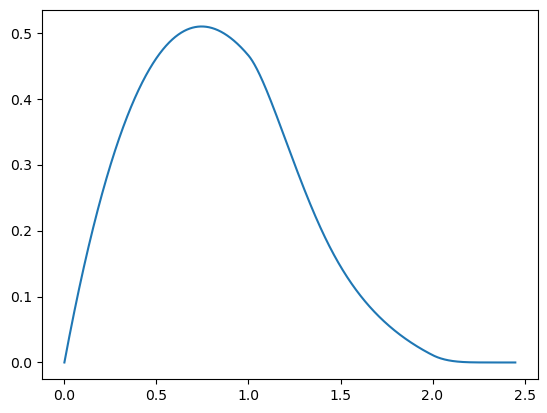

In [45]:
x = np.linspace(0, np.sqrt(6), int(np.sqrt(6)*1000))
y = []
for _x in x:
    y.append(p(_x))

plt.plot(x, y)

In [53]:
f = lambda D: 3*D/2 - 4*D*D/np.pi + 3*D*D*D/(4*np.pi)

a = 9/(4*np.pi)
b = -8/np.pi
c = 3/2

D = (-b - np.sqrt(b*b - 4*a*c))/(2*a)
p = f(D)
print(f"({D:.10f}, {p:.10f})")

(0.7452572091, 0.5095346021)
